In [ ]:
# Importing necessary libraries for data analysis and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# For handling warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_aapl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/AAPL.csv')
df_hpq = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/HPQ.csv')
df_ibm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/IBM.csv')
df_txn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stocks/TXN.csv')


In [ ]:
import numpy as np
from scipy.stats import boxcox

df_aapl['Close_log'] = np.log(df_aapl['Close'] + 1)
df_aapl['Close_sqrt'] = np.sqrt(df_aapl['Close'])
df_aapl['Close_boxcox'], _ = boxcox(df_aapl['Close'] + 1)


This code calculates the skewness of the 'Close' column in the `df_aapl` DataFrame before and after applying various transformations:

1. **Original Skewness**: Calculates the skewness of the original 'Close' data.
2. **Log Transformation Skewness**: Calculates the skewness of the 'Close_log' column after applying the log transformation.
3. **Square Root Transformation Skewness**: Calculates the skewness of the 'Close_sqrt' column after applying the square root transformation.
4. **Box-Cox Transformation Skewness**: Calculates the skewness of the 'Close_boxcox' column after applying the Box-Cox transformation.

The printed results help assess how each transformation affects the distribution's symmetry and the success of skewness correction.







In [ ]:

skew_original = df_aapl['Close'].skew()
skew_log = df_aapl['Close_log'].skew()
skew_sqrt = df_aapl['Close_sqrt'].skew()
skew_boxcox = pd.Series(df_aapl['Close_boxcox']).skew()

print(f"Original Skewness: {skew_original}")
print(f"Log Transformation Skewness: {skew_log}")
print(f"Square Root Transformation Skewness: {skew_sqrt}")
print(f"Box-Cox Transformation Skewness: {skew_boxcox}")


Original Skewness: 2.5045276102319933
Log Transformation Skewness: 0.8535555176510303
Square Root Transformation Skewness: 1.6211545809555206
Box-Cox Transformation Skewness: 0.43527466713563334


In [ ]:

df_aapl['Open_log'] = np.log(df_aapl['Open'])
df_aapl['High_log'] = np.log(df_aapl['High'])
df_aapl['Low_log'] = np.log(df_aapl['Low'])
df_aapl['Adj Close_log'] = np.log(df_aapl['Adj Close'])
df_aapl['Volume_log'] = np.log(df_aapl['Volume'])


df_aapl['Open_sqrt'] = np.sqrt(df_aapl['Open'])
df_aapl['High_sqrt'] = np.sqrt(df_aapl['High'])
df_aapl['Low_sqrt'] = np.sqrt(df_aapl['Low'])
df_aapl['Adj Close_sqrt'] = np.sqrt(df_aapl['Adj Close'])
df_aapl['Volume_sqrt'] = np.sqrt(df_aapl['Volume'])

from scipy.stats import boxcox
df_aapl['Open_boxcox'], _ = boxcox(df_aapl['Open'])
df_aapl['High_boxcox'], _ = boxcox(df_aapl['High'])
df_aapl['Low_boxcox'], _ = boxcox(df_aapl['Low'])
df_aapl['Adj Close_boxcox'], _ = boxcox(df_aapl['Adj Close'])

This helps compare how the transformations reduce skewness in the data, aiming for a more normal distribution.

In [ ]:

skewness_before = df_aapl[['Open', 'High', 'Low', 'Adj Close', 'Volume']].skew()
skewness_after = df_aapl[['Open_log', 'High_log', 'Low_log', 'Adj Close_log',
                          'Open_sqrt', 'High_sqrt', 'Low_sqrt', 'Adj Close_sqrt', 'Volume_sqrt',
                          'Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox']].skew()

print("Skewness Before Transformation:\n", skewness_before)
print("\nSkewness After Transformation:\n", skewness_after)


Skewness Before Transformation:
 Open         2.504632
High         2.502208
Low          2.506714
Adj Close    2.550677
Volume       3.565699
dtype: float64

Skewness After Transformation:
 Open_log            0.482872
High_log            0.481997
Low_log             0.484246
Adj Close_log       0.494009
Open_sqrt           1.620771
High_sqrt           1.621456
Low_sqrt            1.620661
Adj Close_sqrt      1.679402
Volume_sqrt         1.299776
Open_boxcox         0.181226
High_boxcox         0.179749
Low_boxcox          0.182882
Adj Close_boxcox    0.180085
dtype: float64


- Applied Box-Cox transformation to the 'Open', 'High', 'Low', 'Adj Close', and 'Close' columns.
- Recalculated skewness after the transformation to reduce skew and normalize the data for modeling.

In [ ]:
from scipy import stats

df_aapl['Open_boxcox'], _ = stats.boxcox(df_aapl['Open'] + 1)
df_aapl['High_boxcox'], _ = stats.boxcox(df_aapl['High'] + 1)
df_aapl['Low_boxcox'], _ = stats.boxcox(df_aapl['Low'] + 1)
df_aapl['Adj Close_boxcox'], _ = stats.boxcox(df_aapl['Adj Close'] + 1)
df_aapl['Close_boxcox'], _ = stats.boxcox(df_aapl['Close'] + 1)

skewness_after_boxcox = df_aapl[['Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox', 'Close_boxcox']].skew()

print("Skewness After Box-Cox Transformation:")
print(skewness_after_boxcox)


Skewness After Box-Cox Transformation:
Open_boxcox         0.435237
High_boxcox         0.433381
Low_boxcox          0.437331
Adj Close_boxcox    0.458762
Close_boxcox        0.435275
dtype: float64


Feature Selection

In [ ]:

df_aapl_cleaned = df_aapl[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume',
                           'Open_boxcox', 'High_boxcox', 'Low_boxcox', 'Adj Close_boxcox',
                           'Close_boxcox']]

print(df_aapl_cleaned.head())


         Date      Open      High       Low  Adj Close     Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348   0.098943  0.128348  469033600   
1  1980-12-15  0.122210  0.122210  0.121652   0.093781  0.121652  175884800   
2  1980-12-16  0.113281  0.113281  0.112723   0.086898  0.112723  105728000   
3  1980-12-17  0.115513  0.116071  0.115513   0.089049  0.115513   86441600   
4  1980-12-18  0.118862  0.119420  0.118862   0.091630  0.118862   73449600   

   Open_boxcox  High_boxcox  Low_boxcox  Adj Close_boxcox  Close_boxcox  
0     0.117689     0.118173    0.117674          0.092374      0.117689  
1     0.112503     0.112516    0.112016          0.087857      0.112030  
2     0.104886     0.104897    0.104395          0.081785      0.104407  
3     0.106798     0.107287    0.106786          0.083688      0.106798  
4     0.109657     0.110145    0.109644          0.085966      0.109657  


## Train Validation Test Split

The code splits the data into training, validation, and test sets. The features `X` and target `Y` are split as follows:

- 70% for training (`X_train`, `Y_train`)
- 15% for validation (`X_val`, `Y_val`)
- 15% for testing (`X_test`, `Y_test`)

The split is done using a 30% test size, followed by splitting the remaining 70% into validation and test sets without shuffling (time series data).

In [ ]:
from sklearn.model_selection import train_test_split

X = df_aapl_cleaned[['Open_boxcox', 'High_boxcox', 'Low_boxcox']]
Y = df_aapl_cleaned['Close_boxcox']

X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, shuffle=False)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (7736, 3), Validation set: (1658, 3), Test set: (1658, 3)


**SVR**

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Spliting the data into training, validation, and test sets (80-10-10 split)

# Initialize the SVR model with a radial basis function (RBF) kernel
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svm_regressor.fit(X_train, Y_train)

# Predict on the training, validation, and test sets
Y_train_pred = svm_regressor.predict(X_train)
Y_val_pred = svm_regressor.predict(X_val)
Y_test_pred = svm_regressor.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, data_type="Data"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'{data_type} MAE: {mae}')
    print(f'{data_type} MSE: {mse}')
    print(f'{data_type} RMSE: {rmse}')
    print(f'{data_type} R²: {r2}')
    print(f'{data_type} MAPE: {mape*100}%')

# Print metrics for train, validation, and test sets
print_metrics(Y_train, Y_train_pred, "Training")
print_metrics(Y_val, Y_val_pred, "Validation")
print_metrics(Y_test, Y_test_pred, "Test")


Training MAE: 0.03637190525728542
Training MSE: 0.0017239188233983298
Training RMSE: 0.04152010143771725
Training R²: 0.9901502176233413
Training MAPE: 17.796256735494644%
Validation MAE: 0.32375398574364433
Validation MSE: 0.12565230958820606
Validation RMSE: 0.3544746952720406
Validation R²: -20.363832634210066
Validation MAPE: 18.209886141030683%
Test MAE: 0.9154445114543264
Test MSE: 0.8687562844398153
Test RMSE: 0.9320709653453515
Test R²: -142.95130928972367
Test MAPE: 45.14344678997438%


In [ ]:
!pip install hpbandster


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error



# Initialize the SVR model with a radial basis function (RBF) kernel
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svm_regressor.fit(X_train, Y_train)

# Predict on the training, validation, and test sets
Y_train_pred = svm_regressor.predict(X_train)
Y_val_pred = svm_regressor.predict(X_val)
Y_test_pred = svm_regressor.predict(X_test)

# Function to print metrics
def print_metrics(y_true, y_pred, data_type="Data"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'{data_type} MAE: {mae}')
    print(f'{data_type} MSE: {mse}')
    print(f'{data_type} RMSE: {rmse}')
    print(f'{data_type} R²: {r2}')
    print(f'{data_type} MAPE: {mape*100}%')

# Print metrics for train, validation, and test sets
print_metrics(Y_train, Y_train_pred, "Training")
print_metrics(Y_val, Y_val_pred, "Validation")
print_metrics(Y_test, Y_test_pred, "Test")

Training MAE: 0.03637190525728542
Training MSE: 0.0017239188233983298
Training RMSE: 0.04152010143771725
Training R²: 0.9901502176233413
Training MAPE: 17.796256735494644%
Validation MAE: 0.32375398574364433
Validation MSE: 0.12565230958820606
Validation RMSE: 0.3544746952720406
Validation R²: -20.363832634210066
Validation MAPE: 18.209886141030683%
Test MAE: 0.9154445114543264
Test MSE: 0.8687562844398153
Test RMSE: 0.9320709653453515
Test R²: -142.95130928972367
Test MAPE: 45.14344678997438%


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the SVR model and parameter grid
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, Y_train)

# Best model from GridSearchCV
best_svr_model = grid_search.best_estimator_

# Predictions
Y_train_pred = best_svr_model.predict(X_train_scaled)
Y_val_pred = best_svr_model.predict(X_val_scaled)
Y_test_pred = best_svr_model.predict(X_test_scaled)

# Metrics function
def print_metrics(y_true, y_pred, data_type="Data"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'{data_type} MAE: {mae}')
    print(f'{data_type} MSE: {mse}')
    print(f'{data_type} RMSE: {rmse}')
    print(f'{data_type} R²: {r2}')
    print(f'{data_type} MAPE: {mape*100}%')

# Print metrics
print_metrics(Y_train, Y_train_pred, "Training")
print_metrics(Y_val, Y_val_pred, "Validation")
print_metrics(Y_test, Y_test_pred, "Test")

Training MAE: 0.002701507006094981
Training MSE: 1.1882418415655856e-05
Training RMSE: 0.003447088396843901
Training R²: 0.9999321086156064
Training MAPE: 1.078639090696742%
Validation MAE: 0.00121361842970857
Validation MSE: 2.324304733210236e-06
Validation RMSE: 0.0015245670641891214
Validation R²: 0.9996048138114298
Validation MAPE: 0.07006829084406913%
Test MAE: 0.0008198589912968133
Test MSE: 1.2009190946877967e-06
Test RMSE: 0.0010958645421254383
Test R²: 0.9998010099274933
Test MAPE: 0.04114398420789653%


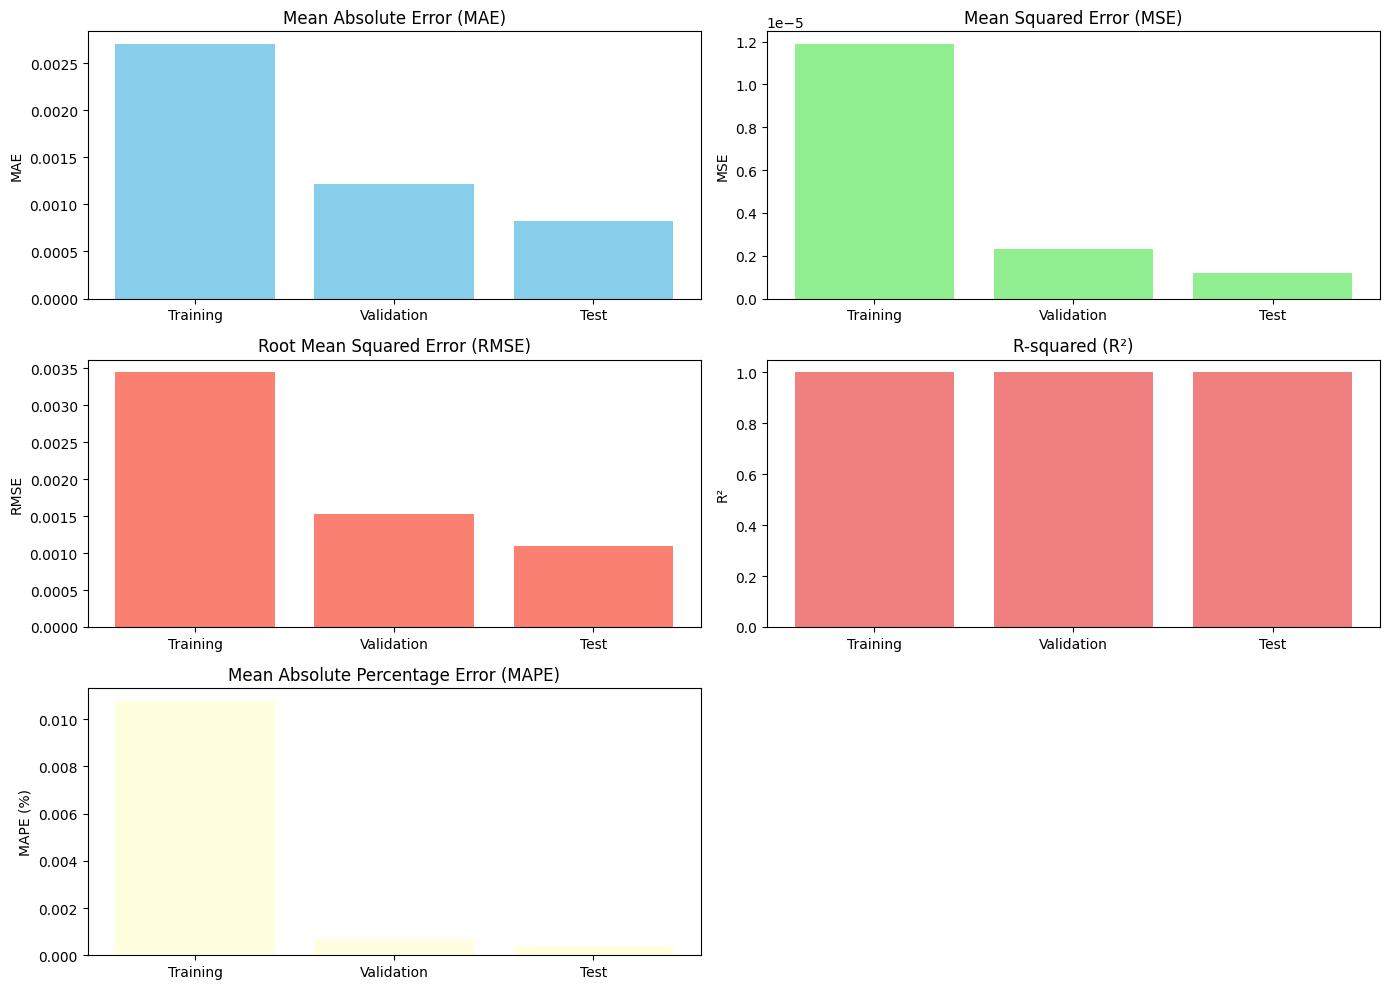

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
data_types = ['Training', 'Validation', 'Test']
mae_values = [mean_absolute_error(Y_train, Y_train_pred),
              mean_absolute_error(Y_val, Y_val_pred),
              mean_absolute_error(Y_test, Y_test_pred)]

mse_values = [mean_squared_error(Y_train, Y_train_pred),
              mean_squared_error(Y_val, Y_val_pred),
              mean_squared_error(Y_test, Y_test_pred)]

rmse_values = [mean_squared_error(Y_train, Y_train_pred, squared=False),
               mean_squared_error(Y_val, Y_val_pred, squared=False),
               mean_squared_error(Y_test, Y_test_pred, squared=False)]

r2_values = [r2_score(Y_train, Y_train_pred),
             r2_score(Y_val, Y_val_pred),
             r2_score(Y_test, Y_test_pred)]

mape_values = [mean_absolute_percentage_error(Y_train, Y_train_pred),
               mean_absolute_percentage_error(Y_val, Y_val_pred),
               mean_absolute_percentage_error(Y_test, Y_test_pred)]


# Create subplots to visualize the metrics
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

# MAE plot
axs[0, 0].bar(data_types, mae_values, color='skyblue')
axs[0, 0].set_title('Mean Absolute Error (MAE)')
axs[0, 0].set_ylabel('MAE')

# MSE plot
axs[0, 1].bar(data_types, mse_values, color='lightgreen')
axs[0, 1].set_title('Mean Squared Error (MSE)')
axs[0, 1].set_ylabel('MSE')

# RMSE plot
axs[1, 0].bar(data_types, rmse_values, color='salmon')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# R² plot
axs[1, 1].bar(data_types, r2_values, color='lightcoral')
axs[1, 1].set_title('R-squared (R²)')
axs[1, 1].set_ylabel('R²')

# MAPE plot
axs[2, 0].bar(data_types, mape_values, color='lightyellow')
axs[2, 0].set_title('Mean Absolute Percentage Error (MAPE)')
axs[2, 0].set_ylabel('MAPE (%)')

# Hide the empty subplot
axs[2, 1].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


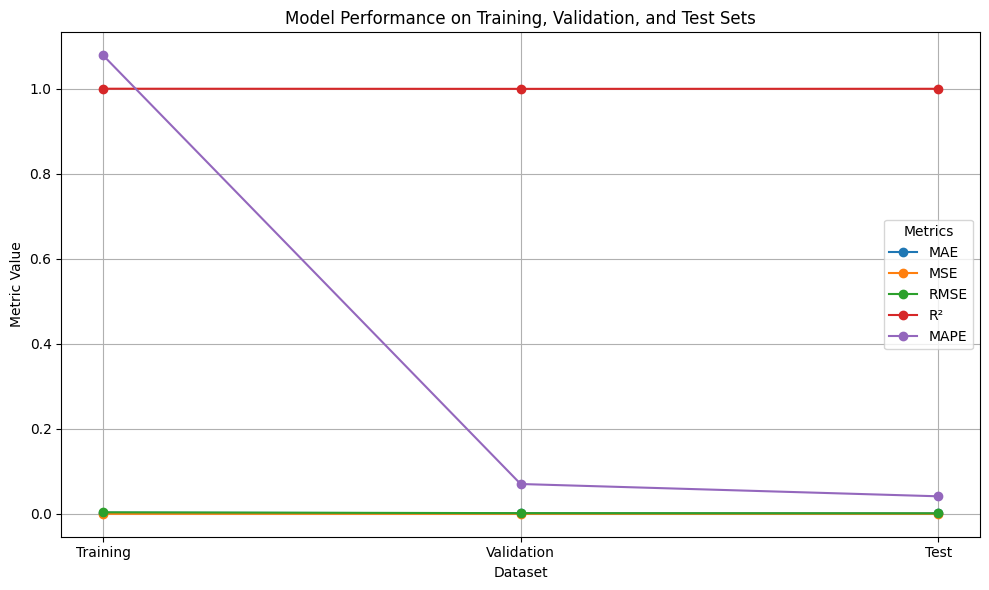

In [ ]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE']
train_metrics = [
    mean_absolute_error(Y_train, Y_train_pred),
    mean_squared_error(Y_train, Y_train_pred),
    mean_squared_error(Y_train, Y_train_pred, squared=False),
    r2_score(Y_train, Y_train_pred),
    mean_absolute_percentage_error(Y_train, Y_train_pred) * 100
]
val_metrics = [
    mean_absolute_error(Y_val, Y_val_pred),
    mean_squared_error(Y_val, Y_val_pred),
    mean_squared_error(Y_val, Y_val_pred, squared=False),
    r2_score(Y_val, Y_val_pred),
    mean_absolute_percentage_error(Y_val, Y_val_pred) * 100
]
test_metrics = [
    mean_absolute_error(Y_test, Y_test_pred),
    mean_squared_error(Y_test, Y_test_pred),
    mean_squared_error(Y_test, Y_test_pred, squared=False),
    r2_score(Y_test, Y_test_pred),
    mean_absolute_percentage_error(Y_test, Y_test_pred) * 100
]

# Plotting the line graph
plt.figure(figsize=(10, 6))

# Plot each metric
for i, metric in enumerate(metrics):
    plt.plot(['Training', 'Validation', 'Test'],
             [train_metrics[i], val_metrics[i], test_metrics[i]],
             marker='o', label=metric)

# Customize the plot
plt.title('Model Performance on Training, Validation, and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Metric Value')
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
